In [4]:

import kaggle
import shutil
import os
import zipfile


In [ ]:
#add json file to directory
# Create the .kaggle directory if it doesn't exist
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Move kaggle.json to the .kaggle directory
shutil.move('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))



!kaggle competitions download -c induction-task 


In [ ]:

# Unzipping the file
with zipfile.ZipFile('induction-task.zip', 'r') as zip_ref:
    zip_ref.extractall('DATA')

print(f"Contents extracted to {'DATA'}")


In [3]:
import cv2
import matplotlib.pyplot as plt

In [3]:


# Resized shape
new_size = (224, 224)

# Source and destination directories
source_dir = 'DATA/Data/Train/Real'
destination_dir = 'DATA/Data/REALN'

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Reshaping all images to 224x224
for filename in os.listdir(source_dir):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        img_path = os.path.join(source_dir, filename)
        img = cv2.imread(img_path)
        
        if img is not None:  # Ensure the image was read successfully
            img_resized = cv2.resize(img, new_size)
            save_path = os.path.join(destination_dir, filename)
            cv2.imwrite(save_path, img_resized)
        else:
            print(f"Failed to read {filename}")

print("All real training images are reshaped and saved.")


All real training images are reshaped and saved.


In [4]:

# Resized shape
new_size = (224, 224)

# Source and destination directories
source_dir = 'DATA/Data/Train/AI'
destination_dir = 'DATA/Data/AIN'

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Reshaping all images to 224x224
for filename in os.listdir(source_dir):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):  # Case-insensitive check
        img_path = os.path.join(source_dir, filename)
        img = cv2.imread(img_path)
        
        if img is not None:  # Ensure the image was read successfully
            img_resized = cv2.resize(img, new_size)
            save_path = os.path.join(destination_dir, filename)
            cv2.imwrite(save_path, img_resized)
        else:
            print(f"Failed to read {filename}")

print("All images are reshaped and saved.")


All images are reshaped and saved.


In [5]:
import numpy as np
from PIL import Image

# Path to the folder containing images
image_folder = "DATA\Data\REALN"

# Desired size (all images should have the same dimensions)
image_size = (224, 224)  # Example size (height, width)

# List to store all image arrays
image_array_list = []

# Loop through all images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).resize(image_size)
        img_array = np.array(img)  
        image_array_list.append(img_array)

# Stack all image arrays into a single NumPy array (N, H, W, C)
real_array = np.stack(image_array_list)

print(f"Final array shape: {real_array.shape}")



Final array shape: (400, 224, 224, 3)


In [6]:
print(real_array[87].shape)

(224, 224, 3)


In [7]:
import os
import numpy as np
from PIL import Image

# Path to the folder containing images
image_folder = "DATA/Data/AIN"

# Desired size (all images should have the same dimensions)
image_size = (224, 224)  # Example size (height, width)

# List to store all image arrays
image_array_list = []

# Loop through all images in the folder
for filename in os.listdir(image_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):  # Case-insensitive check
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).resize(image_size)  # Resize the image
        img_array = np.array(img)  # Convert to NumPy array
        image_array_list.append(img_array)  # Append to the list

# Stack all image arrays into a single NumPy array (N, H, W, C)
ai_array = np.stack(image_array_list)

# Print the final shape of the stacked array
print(f"Final array shape: {ai_array.shape}")


Final array shape: (401, 224, 224, 3)


In [8]:
ai_labels = np.zeros(len(ai_array))  # [0, 0, ..., 0]
real_labels = np.ones(len(real_array))  # [1, 1, ..., 1]

X = np.concatenate((ai_array, real_array), axis=0)  # Combine image arrays
Y = np.concatenate((ai_labels, real_labels), axis=0)  # Combine labels

In [9]:
print(X.shape)
print(Y.shape)

(801, 224, 224, 3)
(801,)


In [10]:
from sklearn.utils import shuffle

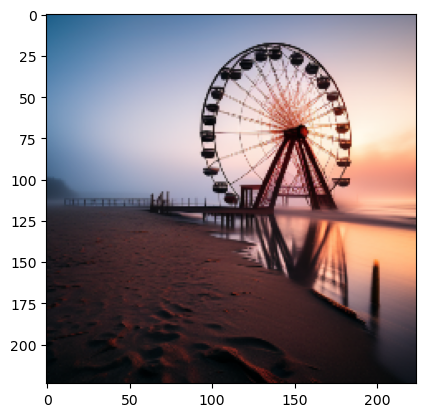

In [11]:
plt.imshow(X[10])

In [12]:
print(Y[10])

0.0


In [13]:
X = X / 255.0
print(X[50])

[[[0.38823529 0.40392157 0.45882353]
  [0.39215686 0.40784314 0.45490196]
  [0.39215686 0.40784314 0.45490196]
  ...
  [0.81568627 0.65098039 0.60392157]
  [0.81568627 0.65098039 0.6       ]
  [0.81960784 0.64705882 0.6       ]]

 [[0.39215686 0.40784314 0.45882353]
  [0.4        0.41176471 0.45882353]
  [0.4        0.41176471 0.4627451 ]
  ...
  [0.83137255 0.65490196 0.60784314]
  [0.82745098 0.65490196 0.60784314]
  [0.83137255 0.65490196 0.60784314]]

 [[0.40392157 0.41176471 0.45882353]
  [0.40392157 0.41568627 0.4627451 ]
  [0.40784314 0.41568627 0.46666667]
  ...
  [0.84313725 0.6627451  0.60784314]
  [0.84313725 0.6627451  0.60784314]
  [0.84313725 0.6627451  0.60784314]]

 ...

 [[0.01176471 0.09019608 0.00392157]
  [0.00392157 0.09411765 0.        ]
  [0.03921569 0.17254902 0.00392157]
  ...
  [0.1254902  0.23137255 0.30196078]
  [0.11372549 0.22745098 0.29411765]
  [0.11764706 0.22352941 0.30980392]]

 [[0.01176471 0.08627451 0.00784314]
  [0.02352941 0.12941176 0.        ]


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='leaky_relu', padding = 'same' ,input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
cnn.fit(X, Y, epochs=10, batch_size=8)


Epoch 1/10
101/101 [==============================] - 4s 38ms/step - loss: 0.3189 - accuracy: 0.8627
Epoch 2/10
101/101 [==============================] - 4s 38ms/step - loss: 0.0795 - accuracy: 0.9738
Epoch 3/10
101/101 [==============================] - 4s 37ms/step - loss: 0.0384 - accuracy: 0.9838
Epoch 4/10
101/101 [==============================] - 4s 37ms/step - loss: 0.0328 - accuracy: 0.9913
Epoch 5/10
101/101 [==============================] - 4s 38ms/step - loss: 0.0436 - accuracy: 0.9888
Epoch 6/10
101/101 [==============================] - 4s 38ms/step - loss: 0.0474 - accuracy: 0.9838
Epoch 7/10
101/101 [==============================] - 4s 39ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 8/10
101/101 [==============================] - 4s 39ms/step - loss: 3.4640e-04 - accuracy: 1.0000
Epoch 9/10
101/101 [==============================] - 4s 39ms/step - loss: 3.1051e-04 - accuracy: 1.0000
Epoch 10/10
101/101 [==============================] - 4s 39ms/step - loss: 3.9351e

In [16]:

# Set the path to your images folder
image_folder = "DATA\Data\Test"
output_folder = "DATA\Data\TESTN"

# Desired shape (width, height)
new_size = (224, 224)

# Loop through all images and reshape them
a=0
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):  # Add other extensions if needed
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, new_size)  # Resize the image
        cv2.imwrite(os.path.join(output_folder, filename), img_resized)  # Save the reshaped image
        a+=1

print("All images have been reshaped and saved.")
print(a)


All images have been reshaped and saved.
200


In [27]:
import os
import numpy as np
from PIL import Image
import re

# Path to the folder containing images
image_folder = "DATA\Data\TESTN"

# List to store all image arrays
image_array_list = []

# Function to extract the numerical part of the filename
def extract_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else float('inf')  # Return a large number if no digits are found

# Get a sorted list of filenames based on numerical order
sorted_filenames = sorted(
    [f for f in os.listdir(image_folder) if f.endswith(".jpg") or f.endswith(".jpeg")],
    key=extract_number
)

# Loop through sorted filenames
for filename in sorted_filenames:
    img_path = os.path.join(image_folder, filename)
    img = Image.open(img_path)  # No resizing, just open the image
    img_array = np.array(img)  # Convert image to NumPy array (H, W, C)
    image_array_list.append(img_array)  # Append the array to the list

# Stack all image arrays into a single NumPy array (N, H, W, C)
test_array = np.stack(image_array_list)

print(f"Final array shape: {test_array.shape}")


Final array shape: (200, 224, 224, 3)


In [28]:
test_array=test_array/255.0
prediction=cnn.predict(test_array)

7/7 [==============================] - 0s 50ms/step


In [29]:
import numpy as np
import csv

# Example: image IDs (filenames for the 200 test images)
image_ids = [f'image_{i+1}' for i in range(200)]  # Skip image_62

# Convert the prediction probabilities to labels
# If prediction > 0.5, classify as 'Real'; else classify as 'AI'
labels = ['Real' if pred > 0.5 else 'AI' for pred in prediction]

# Ensure the length of image_ids and labels match after removing image_62
if len(image_ids) != len(labels):
    print("Error: Mismatch between number of image IDs and predictions.")
else:
    # Open a CSV file for writing
    with open('submission.csv', mode='w', newline='') as file:
        writer = csv.writer(file)

        # Write the header
        writer.writerow(['Id', 'Label'])

        # Write each image ID and corresponding label
        for img_id, label in zip(image_ids, labels):
            writer.writerow([img_id, label])

    print("Submission file created: submission.csv")


Submission file created: submission.csv


In [26]:

cnn.save('Task1.h5')


In [30]:

cnn.save_weights('my_model_weights.h5')


THIS IS FOR TASK 1 SECONDF  PHASE


In [31]:

# Unzipping the file
with zipfile.ZipFile('induction-task-2025.zip', 'r') as zip_ref:
    zip_ref.extractall('DATA')

print(f"Contents extracted to {'DATA'}")


Contents extracted to DATA


In [32]:

# Set the path to your images folder
image_folder = "DATA\Test_Images"
output_folder = "DATA\TEST2"

# Desired shape (width, height)
new_size = (224, 224)

# Loop through all images and reshape them
a=0
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):  # Add other extensions if needed
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, new_size)  # Resize the image
        cv2.imwrite(os.path.join(output_folder, filename), img_resized)  # Save the reshaped image
        a+=1

print("All images have been reshaped and saved.")
print(a)


All images have been reshaped and saved.
200


In [33]:
import os
import numpy as np
from PIL import Image
import re

# Path to the folder containing images
image_folder = "DATA\TEST2"

# List to store all image arrays
image_array_list = []

# Function to extract the numerical part of the filename
def extract_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else float('inf')  # Return a large number if no digits are found

# Get a sorted list of filenames based on numerical order
sorted_filenames = sorted(
    [f for f in os.listdir(image_folder) if f.endswith(".jpg") or f.endswith(".jpeg")],
    key=extract_number
)

# Loop through sorted filenames
for filename in sorted_filenames:
    img_path = os.path.join(image_folder, filename)
    img = Image.open(img_path)  # No resizing, just open the image
    img_array = np.array(img)  # Convert image to NumPy array (H, W, C)
    image_array_list.append(img_array)  # Append the array to the list

# Stack all image arrays into a single NumPy array (N, H, W, C)
test_array = np.stack(image_array_list)

print(f"Final array shape: {test_array.shape}")


Final array shape: (200, 224, 224, 3)


In [34]:
test_array=test_array/255.0
prediction=cnn.predict(test_array)

7/7 [==============================] - 0s 61ms/step


In [38]:
import numpy as np
import csv

# Example: image IDs (filenames for the 200 test images)
image_ids = [f'image_{i}' for i in range(200)]  # Skip image_62

# Convert the prediction probabilities to labels
# If prediction > 0.5, classify as 'Real'; else classify as 'AI'
labels = ['Real' if pred > 0.5 else 'AI' for pred in prediction]

# Ensure the length of image_ids and labels match after removing image_62
if len(image_ids) != len(labels):
    print("Error: Mismatch between number of image IDs and predictions.")
else:
    # Open a CSV file for writing
    with open('submission.csv', mode='w', newline='') as file:
        writer = csv.writer(file)

        # Write the header
        writer.writerow(['Id', 'Label'])

        # Write each image ID and corresponding label
        for img_id, label in zip(image_ids, labels):
            writer.writerow([img_id, label])

    print("Submission file created: submission.csv")


Submission file created: submission.csv
